# Superposition Models

The superposition models calculate the effective wind speed given the local wind speed and deficits (typically from multiple sources) or the effective turbulences from multiple sources. In PyWake, the effective wind speed is representative of the wind speed perceived by the $ith$ turbine's rotor on the wind farm ($u_0^i$), as it is usually mentioned in the literature.

There are four different wake superposition models in PyWake:

- [LinearSum](#LinearSum): Deficits sum up linearly.
- [SquaredSum](#SquaredSum): Deficits sum as root-sum-square.
- [MaxSum](#MaxSum): Only the largest deficit is considered.
- [WeightedSum](#WeightedSum): A weighted sum of the invidiual wake velocity deficits is performed to obtain the total deficit. The ratio between the mean convection velocity and the convection velocity of the combined wake is used to determine the weights. This superposition model is capable of conserving momentum in the streamwise direction.

And one turbulence superposition model in PyWake:

- [SqrMaxSum](#SqrMaxSum): The root-sum-square of the local turbulence intensity and the maximum value of the added turbulence caused by the source turbine is considered.


**Install PyWake if needed**

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from py_wake.literature.gaussian_models import Bastankhah_PorteAgel_2014
from py_wake.literature.gaussian_models import Zong_PorteAgel_2020
from py_wake.turbulence_models import CrespoHernandez
from py_wake.examples.data.hornsrev1 import V80, Hornsrev1Site

site = Hornsrev1Site()
windTurbines = V80()

### LinearSum

In general, LinearSum should be used in combination with `use_effective_ws=True` which makes downstream wind turbines feel the effective wind speed (including wake effects from upstream turbines) instead of the ambient free-stream wind speed. Otherwise negative wind speeds may occur.

Text(0, 0.5, 'y [m]')

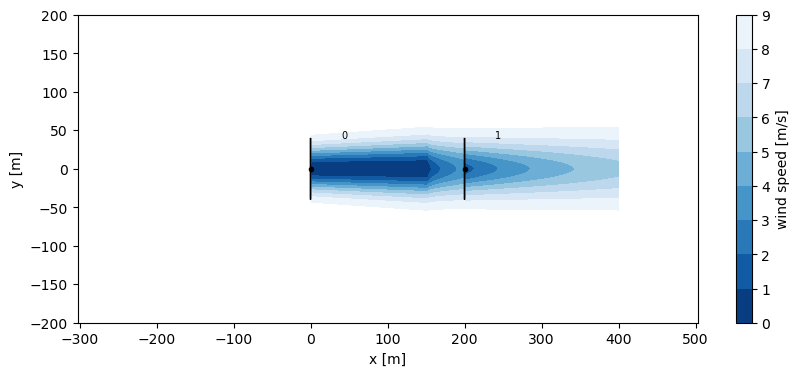

In [3]:
from py_wake.superposition_models import LinearSum

linear_sum = Bastankhah_PorteAgel_2014(site, windTurbines, k=0.0324555, superpositionModel=LinearSum(), use_effective_ws=True)
plt.figure(figsize=(10,4))
linear_sum([0,200],[0,0],wd=270,ws=10).flow_map().plot_wake_map(levels=np.arange(0,10))
plt.xlabel('x [m]')
plt.ylabel('y [m]')

### SquaredSum

The SquaredSum model is often used in combination with wake deficit models where the downstream wakes are scaled with the ambient free-stream velocity to avoid negative wind speeds. It is, however, a method to compensate for an inconsistent formulation, see section 2.2 in https://backend.orbit.dtu.dk/ws/portalfiles/portal/151671395/Park2_Documentation_and_Validation.pdf

Text(0, 0.5, 'y [m]')

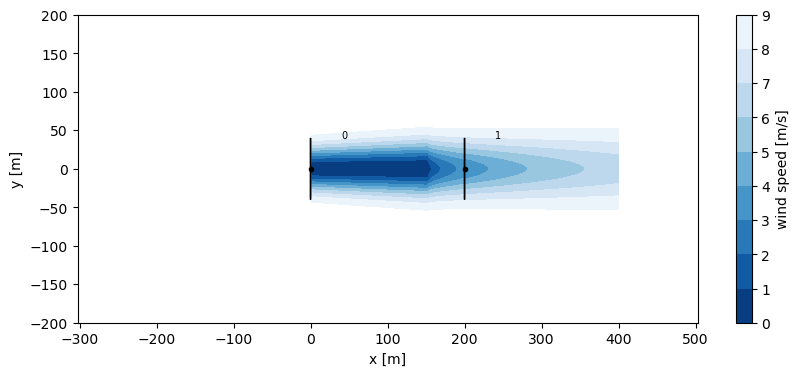

In [4]:
from py_wake.superposition_models import SquaredSum

squared_sum = Bastankhah_PorteAgel_2014(site, windTurbines, k=0.0324555, superpositionModel=SquaredSum())
plt.figure(figsize=(10,4))
squared_sum([0,200],[0,0],wd=270,ws=10).flow_map().plot_wake_map(levels=np.arange(0,10))
plt.xlabel('x [m]')
plt.ylabel('y [m]')

### MaxSum

Text(0, 0.5, 'y [m]')

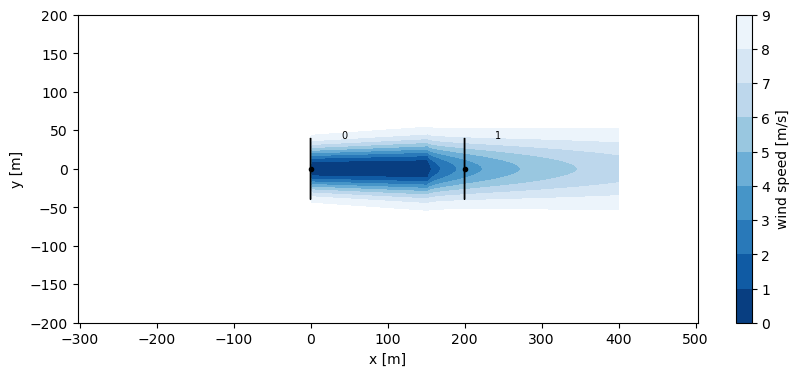

In [5]:
from py_wake.superposition_models import MaxSum

max_sum = Bastankhah_PorteAgel_2014(site, windTurbines, k=0.0324555, superpositionModel=MaxSum())
plt.figure(figsize=(10,4))
max_sum([0,200],[0,0],wd=270,ws=10).flow_map().plot_wake_map(levels=np.arange(0,10))
plt.xlabel('x [m]')
plt.ylabel('y [m]')

### WeightedSum

Text(0, 0.5, 'y [m]')

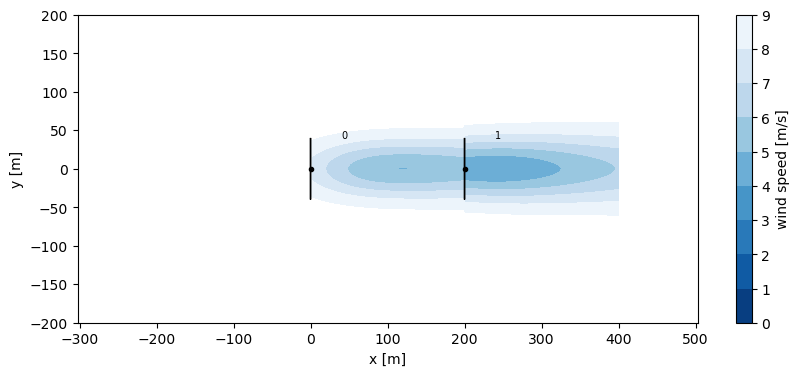

In [6]:
from py_wake.superposition_models import WeightedSum

weighted_sum = Zong_PorteAgel_2020(site, windTurbines, use_effective_ws=True, superpositionModel=WeightedSum())

plt.figure(figsize=(10,4))
weighted_sum([0,200],[0,0],wd=270,ws=10).flow_map().plot_wake_map(levels=np.arange(0,10))
plt.xlabel('x [m]')
plt.ylabel('y [m]')

### SqrMaxSum

Text(0, 0.5, 'y [m]')

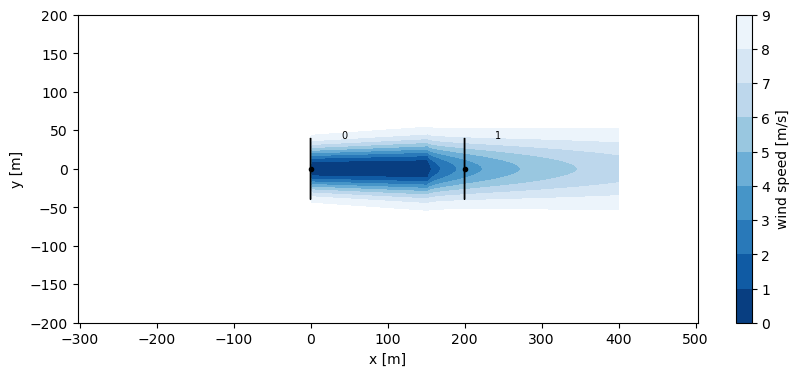

In [7]:
from py_wake.superposition_models import SqrMaxSum

sqr_max_sum = Zong_PorteAgel_2020(site, windTurbines, use_effective_ws=True, superpositionModel=WeightedSum(),
                                  turbulenceModel=CrespoHernandez(addedTurbulenceSuperpositionModel=SqrMaxSum()))
plt.figure(figsize=(10,4))
sqr_max_sum([0,200],[0,0],wd=270,ws=10).flow_map().plot_wake_map(levels=np.arange(0,10))
plt.xlabel('x [m]')
plt.ylabel('y [m]')